In [26]:
import requests
import urllib.request
def kakao_reverse_geocode(lat, lon):
    addr_list = []
    roadaddr_list =[]
    building_list =[]
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/geo/coord2address.json?&x=' + str(lon) +'&y=' + str(lat) 
    option = '&sort=distance&input_coord=WGS84'
    result = requests.get(url+option, headers={'Authorization': api_key}).json()
    #print(result)
    match_first = result['documents'][0]
    #print(match_first)
    if match_first["road_address"]== None:
        addr_list.append(match_first["address"]["address_name"])
        roadaddr_list.append("no results")
        building_list.append("no results")
        return addr_list,roadaddr_list,building_list
    else:
        addr_list.append(match_first["address"]["address_name"])
        roadaddr_list.append(match_first["road_address"]["address_name"])
        building_list.append(match_first["road_address"]["building_name"])
        return addr_list, roadaddr_list,building_list

In [27]:
def kakao_get_place(place_name):
    place = []
    addr = []
    type_list = []
    lat = []
    lon = []
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?&query='
    query = urllib.parse.quote(place_name)
    for j in range(1,4):
        result = requests.get(url+query+"&page=" + str(j), headers={'Authorization': api_key}).json()
        if len(result['documents']) != 0:
            for i in range(len(result['documents'])):
                #print(result['documents'][i])
                if result['documents'][i]["place_name"] !="":
                    if result['documents'][i]["place_name"] not in place:
                        place.append(result['documents'][i]["place_name"])
                        addr.append(result['documents'][i]["address_name"])
                        type_list.append(result['documents'][i]['category_name'])
                        lat.append(result['documents'][i]['y'])
                        lon.append(result['documents'][i]['x'])
        else:
            place.append("no results")
    return place,type_list,addr,lat,lon

In [28]:
def kakao_get_addr(addr):
    lat = []
    lon = []
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/search/address.json?&query='
    query = urllib.parse.quote(addr)
    result = requests.get(url+query, headers={'Authorization': api_key}).json()
    lat.append(result["documents"][0]["y"])
    lon.append(result["documents"][0]["x"])
    return lat, lon

In [29]:
def kakao_get_place_addr(addr):
    place = []
    api_key = 'KakaoAK 5bc7785bedf372180f58929a0899232f'
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?&query='
    query = urllib.parse.quote(addr)
    for j in range(1,4):
        result = requests.get(url+query+"&page=" + str(j), headers={'Authorization': api_key}).json()
        if len(result['documents']) != 0:
            for i in range(len(result['documents'])):
                #print(result['documents'][i])
                if result['documents'][i]["place_name"] !="":
                    if result['documents'][i]["place_name"] not in place:
                        place.append(result['documents'][i]["place_name"])
        else:
            place.append("no results")
    return place

In [30]:
def remove_0(df):
    for i in range(len(df)):
        if df['lat'][i] == 0 or df['lon'][i] == 0:
            df = df.drop(i)
        
    df = df.reset_index(drop=True)
    return df

In [31]:
def get_xdata(df):
    x = df.iloc[:, [1, 2]].values
    return x

In [6]:
def get_cluster_count(cluster):
    cluster_list = []
    for i in cluster:
        if i not in cluster_list:
            cluster_list.append(i)
    return cluster_list

In [7]:
import pymssql
from math import *
import pandas as pd
import numpy as np 

# DB 서버 주소
server = '203.234.62.143'
# 데이터 베이스 이름
database = 'test'
# 접속 유저명
username = 'sojin'
# 접속 유저 패스워드
password = '1234'

conn = pymssql.connect(server , username, password, database)
curs = conn.cursor()

#curs.execute()

time1 = "2021-03-10 10:43:55.000"
time2 = "2021-03-10 12:09:04.000"
# sql = 'SELECT TOP (1000) *  FROM lifelog_manual'
sql = "SELECT * FROM dataset WHERE time between '" + time1 + "' and '" + time2 +"' order by time asc;"
df = pd.read_sql(sql, con = conn)

conn.close()

In [310]:
df = pd.read_csv(r"./gps데이터/Log_20210806_1.txt",sep=',', header = None, names = ['time', 'lat','lon','x','y','z','speed','svm','step_count','acttype'])
df

,time,lat,lon,x,y,z,speed,svm,step_count,acttype
0,2021-08-06 02:05:15,0.000000,0.000000,0.0,0.0,0.0,0.000000,8.272554,0,NaN
1,2021-08-06 02:05:20,35.945442,126.686452,0.0,0.0,0.0,0.140340,11.437642,0,NaN
2,2021-08-06 02:05:27,35.945411,126.686414,0.0,0.0,0.0,0.632613,7.009473,0,NaN
3,2021-08-06 02:05:30,35.945377,126.686413,0.0,0.0,0.0,0.720497,9.467220,0,NaN
4,2021-08-06 02:05:35,35.945358,126.686369,0.0,0.0,0.0,1.438080,9.593800,13,NaN
...,...,...,...,...,...,...,...,...,...,...
347,2021-08-06 02:34:10,35.944561,126.685752,0.0,0.0,0.0,0.032870,9.762653,523,NaN
348,2021-08-06 02:34:15,35.944561,126.685748,0.0,0.0,0.0,0.054688,9.755841,523,NaN
349,2021-08-06 02:34:20,35.944559,126.685747,0.0,0.0,0.0,0.032107,9.753420,523,NaN
350,2021-08-06 02:34:25,35.944559,126.685746,0.0,0.0,0.0,0.018254,9.753110,523,NaN


In [311]:
df = remove_0(df)
x = get_xdata(df)
x

array([[ 35.9454419, 126.6864525],
       [ 35.9454107, 126.6864139],
       [ 35.9453773, 126.6864129],
       [ 35.9453576, 126.6863692],
       [ 35.9454791, 126.6864473],
       [ 35.9455003, 126.6865126],
       [ 35.9454498, 126.6864731],
       [ 35.945392 , 126.6864274],
       [ 35.9453693, 126.6864018],
       [ 35.9453139, 126.6862502],
       [ 35.9452911, 126.686151 ],
       [ 35.9452598, 126.6860464],
       [ 35.9452624, 126.6860184],
       [ 35.9452532, 126.6860029],
       [ 35.9452478, 126.6860031],
       [ 35.9452436, 126.6860006],
       [ 35.94517  , 126.686002 ],
       [ 35.9451095, 126.6860239],
       [ 35.9450389, 126.6860852],
       [ 35.9449836, 126.6861364],
       [ 35.9449392, 126.6861587],
       [ 35.9448885, 126.6861186],
       [ 35.9448629, 126.6860603],
       [ 35.9448613, 126.6860048],
       [ 35.9448286, 126.6859603],
       [ 35.9447905, 126.6859411],
       [ 35.9447783, 126.6859475],
       [ 35.9447685, 126.6859459],
       [ 35.9447608,

In [312]:
import numpy as np
import folium
from matplotlib import pyplot as plt
import matplotlib as mpl

m = folium.Map(zoom_start = 15, location=[35.945881525000004, 126.683324296048])

for i in range(len(x)):
    folium.Marker(location=[x[i][0], x[i][1]], popup = (i+1)).add_to(m)

m

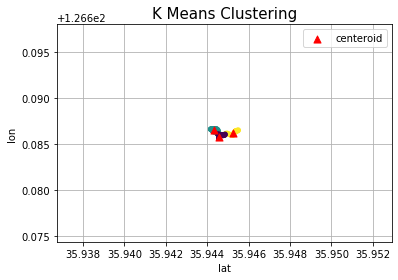

In [321]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init="k-means++", random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[:,0],x[:,1], c = km.labels_, marker='o', s=20)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='r', marker='^',s=50,label = 'centeroid')

plt.title('K Means Clustering', fontsize = 15)
plt.xlabel('lat')
plt.ylabel('lon')
plt.legend()
plt.grid()
plt.show()

In [325]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3) # Gaussian Mixture 객체 생성
g_means = gmm.fit_predict(x)
g_means

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [314]:
km.cluster_centers_

array([[ 35.94457711, 126.68577289],
       [ 35.94433746, 126.68648438],
       [ 35.9452627 , 126.6862231 ]])

In [315]:
import numpy as np
import folium
from matplotlib import pyplot as plt
import matplotlib as mpl

m = folium.Map(zoom_start = 15, location=[35.945881525000004, 126.683324296048])

for i in range(len(km.cluster_centers_)):
    folium.Marker(location=[km.cluster_centers_[i][0], km.cluster_centers_[i][1]], popup = (i+1)).add_to(m)

m

In [316]:
cluster_center = km.cluster_centers_

In [317]:
for i in range(len(km.cluster_centers_)):
    addr, roadaddr,building = kakao_reverse_geocode(km.cluster_centers_[i][0],km.cluster_centers_[i][1])
    for j in addr:
        place = kakao_get_place(j)
        if place[0] == "no results":
            place = building
        print(i+1, "->" ,j)
        print(place)

1 -> 전북 군산시 미룡동 882-4
(['no results', 'no results', 'no results'], [], [], [], [])
2 -> 전북 군산시 미룡동 885-3
(['내자리I원룸'], ['부동산 > 주거시설'], ['전북 군산시 미룡동 885-3'], ['35.9443028197193'], ['126.686506905215'])
3 -> 전북 군산시 미룡동 909
(['no results', 'no results', 'no results'], [], [], [], [])


In [265]:
poi_candidate = pd.read_csv(r"./poi_candidate.csv",encoding='utf-8')
poi_candidate

,상호명,유형,주소,lat,lon
0,긱스타PC클럽,"가정,생활 > 여가시설 > 게임방,PC방",전북 군산시 미룡동 879-1,35.945200,126.686393
1,미니스톱 군산대정문점,"가정,생활 > 편의점 > 미니스톱",전북 군산시 미룡동 879-1,35.945348,126.686321
2,파리바게뜨 군산미룡점,"음식점 > 간식 > 제과,베이커리 > 파리바게뜨",전북 군산시 미룡동 879-2,35.945372,126.686808
3,올리브영 군산대점,"가정,생활 > 드럭스토어 > 올리브영",전북 군산시 미룡동 879-2,35.945397,126.686750
4,노다지감자탕,음식점 > 한식 > 감자탕,전북 군산시 미룡동 364-5,35.945666,126.688248
5,GS25 군산대점,"가정,생활 > 편의점 > GS25",전북 군산시 미룡동 879-2,35.945039,126.686859
6,다이소 군산대점,"가정,생활 > 생활용품점 > 다이소",전북 군산시 미룡동 879-1,35.944976,126.686323
7,김현중내과의원,"의료,건강 > 병원 > 내과",전북 군산시 미룡동 880-1,35.945332,126.687163
8,미룡종로약국,"의료,건강 > 약국",전북 군산시 미룡동 880-1,35.945397,126.687049
9,글로리마트,"가정,생활 > 슈퍼마켓",전북 군산시 미룡동 876-1,35.946496,126.687075


In [32]:
place_list = []
addr_list = []
for i in range(len(cluster_center)):
    addr, roadaddr,building = kakao_reverse_geocode(cluster_center[i][0],cluster_center[i][1])
    for j in addr:
        addr_list.append(j)
        place = kakao_get_place_addr(j)
        if place[0] == "no results":
            place = building
        print(i+1, "->" ,j)
        print(place)
        place_list.append(place)

1 -> 전북 군산시 미룡동 908
['주차장']
2 -> 전북 군산시 미룡동 908
['주차장']
3 -> 전북 군산시 미룡동 868-1
['no results']
4 -> 전북 군산시 미룡동 290-2
['군산대학교', '전북은행 군산대지점', 'GS25 군산대본점', 'CU 군산대도서관점', 'CU 군산대학생회관점', '군산대학교 황룡도서관', '군산대학교 대학본부', '군산대학교 제2학생회관', '군산대학교 박물관', '군산대학교 학생생활관 관리동', '군산대학교 디지털정보관', '한울미디어', '동원문고', 'IBK기업은행365 군산대학교출장소', '더큰도시락 군산대점', '군산대학교 황룡문화원', '군산 청년해외취업지원센터', '군산대학교 종합교육관', '군산대학교 문무관', '군산대학교 산업대학원', '군산대학교 중앙도서관', '군산대학교 음악관', '사회관', '베토벤안경원', '군산시 귀어귀촌지원센터', '군산대학교 교육대학원', '군산대학교 평생교육원제2동', '체험과여행사업단', '황룡쉼터', '군산대학교정류소', '전북은행365코너 군산대지점', '군산대학교 간호학과', '군산대학교 자연과학대학4호관', '군산대생협그라찌에', '군산대학교 진리관', '군산대학교 누리관', '군산 대학교 테니스장1', '군산대학교 인문대학사회과학대학', '군산대학교 자연과학대학 3호관', '군산대학교 남문', '카페드림 군산대학교중앙도서관점', '군산대학교 자연과학대학1호관', '바른교육', '군산대학교 농구장2', '비엔트리니티']


In [146]:
from haversine import haversine
dist_list = []
result_place = []
for i in range(len(addr_list)):
    dist = 0
    cnt = 0
    for k in range(len(poi_candidate)):
        if addr_list[i] == poi_candidate["주소"][k]:
            #print(i, "place_list: ", place_list[i])
            print(i+1, "-> 매칭 장소: ", poi_candidate["상호명"][k])
            a =[]
            a.append(float(poi_candidate["lat"][k]))
            a.append(float(poi_candidate["lon"][k]))
            a = np.array(a)
            dist = haversine(a,np.array(cluster_center[i]), unit='km')
            print(dist)
            #print(dist)
            dist_list.append([i+1,dist, poi_candidate["상호명"][k]])

In [147]:
dist_list.sort(key = lambda dist_list:dist_list[1]) # 거리 순 정렬
dist_list

[]

In [148]:
result_place = []
cluster_num = []
for i in range(len(cluster_center)):
    for j in range(len(dist_list)):
        if str(i+1) in str(dist_list[j][0]):
            print(i+1, "-> 매칭 장소: ", dist_list[j][2])
            result_place.append(dist_list[j])
            cluster_num.append(i+1)
            break

In [149]:
def search_index(n, arr):
    for i in range(len(arr)):
        if arr[i][0] == n:
            return i

In [132]:
for i in range(len(cluster_center)):
    if i+1 in cluster_num:
        print(i+1, "-> 매칭 장소:", result_place[search_index(i+1, result_place)][2])
    else:
        print(i+1, "-> 매칭 장소: 없음")

1 -> 매칭 장소: 지니PC방 미룡점
2 -> 매칭 장소: 없음
3 -> 매칭 장소: 없음
